In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nisch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
train=pd.read_csv('data/train_data.csv')
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
test_val=pd.read_csv('data/test_data_hidden.csv')
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [5]:
test= pd.read_csv("data/test_data.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


### Exploratory Data Analysis (EDA)

In [6]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()

(58, 3, 3)

Train dataset contains 58 duplicate records and train dataset contains 3 duplicate records.

In [7]:
train.drop_duplicates(inplace=True)

In [8]:
train.duplicated().sum()

0

In [9]:
train.shape

(3942, 8)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [11]:
test_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


Train dataset contains 10 missing values in 'reviews.title' column and test dataset contains 3 missing values in 'reviews.title' column.

Reviews containing Positive Sentiments

In [12]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [13]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [14]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [15]:
train.sentiment.value_counts()

sentiment
Positive    3694
Neutral      158
Negative      90
Name: count, dtype: int64

### Class Imbalance Problem
In the train dataset, we have 3,749 (95.1%) sentiments labeled as positive, and 158 (4%) sentiments labeled as Neutral and 93(2.35%) sentiments as Negative. So, it is an imbalanced classification problem.

In [16]:
pd.DataFrame(train.name.value_counts())

,count
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122


In [17]:
train.brand.value_counts() , test_val.brand.value_counts()

(brand
 Amazon    3942
 Name: count, dtype: int64,
 brand
 Amazon    1000
 Name: count, dtype: int64)

In [18]:
train.primaryCategories.value_counts()

primaryCategories
Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: count, dtype: int64

In [19]:
test_val.primaryCategories.value_counts()

primaryCategories
Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: count, dtype: int64

In [20]:
pd.DataFrame(train.categories.value_counts())

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


In [21]:
train.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

In [22]:
print(train['reviews.date'].str.split('T').str[0])

0       2016-12-26
1       2018-01-17
2       2017-12-20
3       2017-08-04
4       2017-01-23
           ...    
3995    2017-12-08
3996    2017-03-31
3997    2017-01-19
3998    2016-05-27
3999    2016-12-30
Name: reviews.date, Length: 3942, dtype: object


### Data Cleaning

In [23]:
# Removing brand column
del train['brand']
del test_val['brand']
del test['brand']

# New columns - Day, Month, Year from date column 
train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


In [24]:
test_val.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...","Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,Positive,23,5,2016
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive,2,1,2018
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive,2,1,2017
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive,25,3,2017
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,Positive,15,11,2017


In [25]:
test.head()

,name,categories,primaryCategories,reviews.text,reviews.title,reviews_day,reviews_month,reviews_year
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...","Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,23,5,2016
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2,1,2018
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2,1,2017
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,25,3,2017
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,15,11,2017


In [26]:
# Label Encoding for item names, categories, primary categories
name = list(set(list(train['name'])+list(test_val['name']))) #taking the unique names in train and test data
categories = list( set( list( train['categories']) + list(test_val['categories']))) #taking the unique categories
primaryCategories = list(train['primaryCategories'].unique()) #taking the unique primarycategories
#primaryCategories=['Electronics', 'Electronics,Hardware', 'Office Supplies,Electronics', 'Electronics,Media']

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [27]:
print(train['name'].unique())
print()
print(train['categories'].unique())
print()
print(train['primaryCategories'].unique())

[ 2  5  9 14 13 20 16  4  0 19 12  7  1 17  3 21 18 15 11  6  8 22 10]

[10  1  2 22  9 16  8 18 12 11  6  0 21 13 14 15 19 17  7  5  4 20  3]

[0 1 3 2]


In [28]:
# Missing Values 
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   int32 
 1   categories         3942 non-null   int32 
 2   primaryCategories  3942 non-null   int32 
 3   reviews.text       3942 non-null   object
 4   reviews.title      3942 non-null   object
 5   sentiment          3942 non-null   object
 6   reviews_day        3942 non-null   int32 
 7   reviews_month      3942 non-null   int32 
 8   reviews_year       3942 non-null   int32 
dtypes: int32(6), object(3)
memory usage: 215.6+ KB


In [30]:
# Text data cleaning : reviews.text, reviews.title

tok = WordPunctTokenizer() 
#splits text into words and punctuation
#Original text: "The quick brown fox jumps over the lazy dog!"
#After WordPunctTokenizer:
#['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '!', ']

ps = PorterStemmer() 
#convert to root form , fishing->fish

wnl = WordNetLemmatizer() 
#convert to base form , better(adjective)->good , better(verb)->better

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
#dictionary is used in NLP tasks to handle negations in text
#"(key-Contraction)isn't:(value-Expanded Form)is not"
#"(key-Contraction)aren't:(value-Expanded Form)are not"

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
#re.compile("\\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\\b")

def data_cleaner(text):
    text = text.replace(r"Äú",'')#Replaces specific characters with their standard forms (likely handling non-standard quotes).
    text = text.replace(r'Äù','')#Replaces another non-standard character.
    text = text.replace(r'‚Äô','\'')#Replaces a specific quote character with a standard apostrophe.
    text = text.lower()#convert to lower case
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text) #Expands contractions with negations 
    #Example:
    #Original text: "I don't lîke this movie! It's so boring."
    #After substitution: "I do not lîke this movie! It is so boring."
    
    text = re.sub("[^a-zA-Z0-9\"]", " ", text) 
    #Removes all characters except letters, numbers, and double quotes, keeping only words and spaces.
    
    #Original text: "I don't like this movie! It's so boring."
    
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3] 
    #Filters the generated tokens, keeping only those with a length greater than 3 characters.
    ##word_tok = ['like', 'movie', 'boring']
    
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    #word_lem = ['like', 'movie', 'bore']
    
    return (" ".join(word_lem).strip()) 
    #"like movie bore"
    
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner) 

In [31]:
test[['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,amazon kindle fire free used that want online ...,very handy device
1,echo show great addition amazon family work ju...,another winner from amazon
2,great value from best bought christmas sale,simple reliable
3,mine email facebook game line also have down l...,love
4,this fantastic item person bought love,fantastic
5,this great devise reading book taking photo be...,book reader
6,have enjoyed learning about home automation us...,first experience with alexa
7,nice size very clear randomly shuts cant remov...,great size
8,awesome product cool design great color would ...,great gift
9,love mine work great with prime have best movie,great


### Visualization

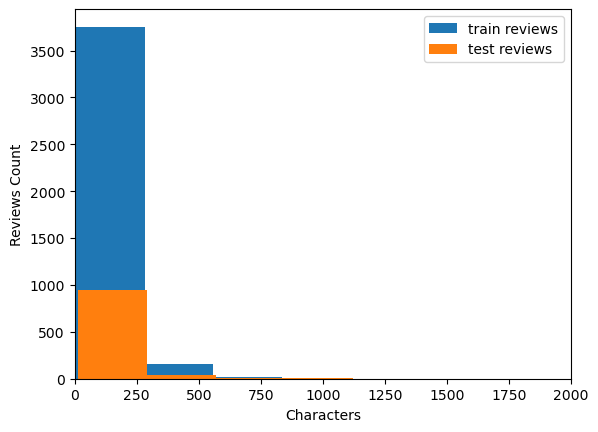

In [32]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,2000)
plt.xlabel('Characters')
plt.ylabel('Reviews Count')
plt.show()

The two histograms represents the frequency of reviews count in training and testing set.

In [33]:
all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

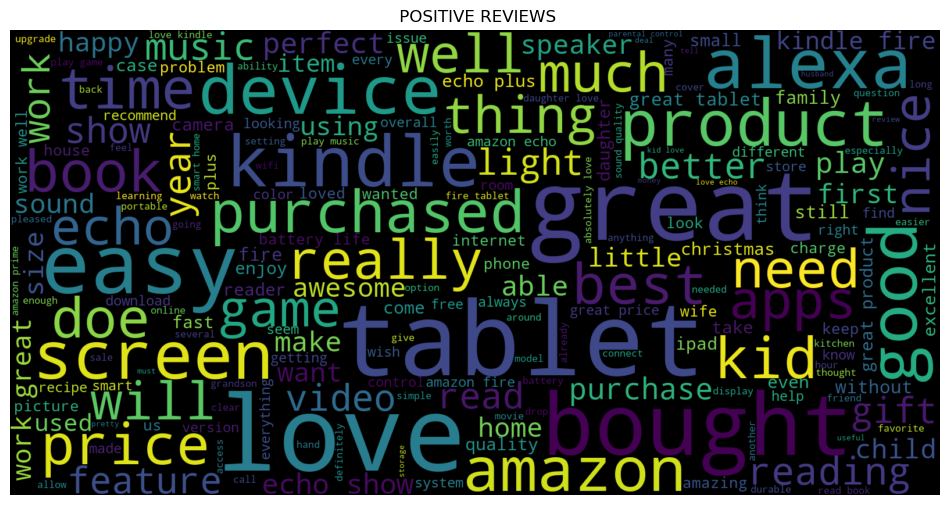

In [34]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

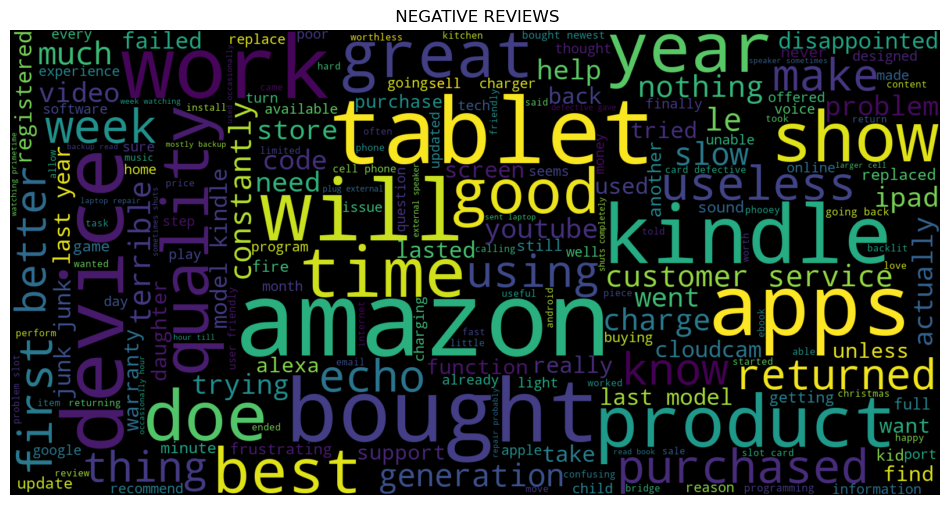

In [35]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

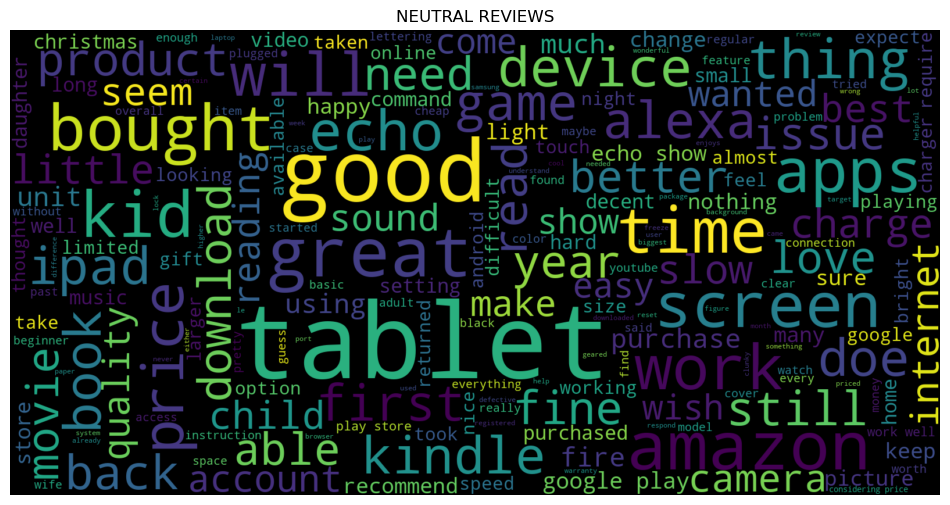

In [36]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

In [37]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

In [38]:
train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016
1,5,1,1,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,2,17,1,2018
2,9,2,1,just average alexa option doe show thing scree...,average,1,20,12,2017
3,14,22,3,very good product exactly what wanted very goo...,greattttttt,2,4,8,2017
4,13,9,0,this purchased bought niece other case compare...,very durable,2,23,1,2017


### TFIDF Vectorizer

In [39]:
#TfidfVectorizer class, which will be used to convert text into numerical representations based on TF-IDF (Term Frequency-Inverse Document Frequency).
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [40]:
# Preparing Features X(text,title) and Label y(sentiment)

train1 = train.reset_index() #Resets the index of the train DataFrame, likely for easier concatenation
combi1=pd.concat([train1,test_val],axis=0,join='outer')#Combines the train1 and test_val DataFrames, stacking them vertically to create a larger dataset.
#len(combi1)=4942

tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values # Extracts the feature values (numerical data) from Train1
y_train1=train['sentiment'].values

x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [41]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text #For text preprocessing and feature extraction.

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"] #Defines a list of punctuation marks to be removed.
stop_words = text.ENGLISH_STOP_WORDS.union(punc)#Combines common English stop words with the punctuation list, creating a comprehensive set of words to ignore.

stemmer = SnowballStemmer('english') #Initializes a stemmer for English language.
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')#Creates a tokenizer that keeps only letters and apostrophes.

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

In [42]:
print(words)

['abil' 'abl' 'absolut' 'access' 'accessori' 'accident' 'account' 'activ'
 'actual' 'ad' 'adapt' 'add' 'addit' 'adjust' 'adult' 'advanc' 'advantag'
 'advertis' 'afford' 'age' 'ahead' 'alarm' 'alexa' 'allow' 'alon' 'alot'
 'alreadi' 'altern' 'alway' 'amaz' 'amazon' 'android' 'angl' 'annoy'
 'anoth' 'answer' 'anybodi' 'anymor' 'anyon' 'anyth' 'anytim' 'anywher'
 'app' 'appear' 'appl' 'applic' 'appreci' 'appropri' 'area' 'arlo' 'arriv'
 'asid' 'ask' 'aspect' 'assist' 'associ' 'audibl' 'audio' 'auto' 'autom'
 'automat' 'avail' 'averag' 'avid' 'awar' 'away' 'awesom' 'awhil' 'babi'
 'background' 'backlight' 'backlit' 'backup' 'bargain' 'base' 'basi'
 'basic' 'bass' 'batteri' 'beat' 'beauti' 'becaus' 'becom' 'bedroom'
 'befor' 'begin' 'beginn' 'believ' 'bell' 'benefit' 'besid' 'best'
 'bestbuy' 'better' 'bigger' 'biggest' 'birthday' 'black' 'block' 'blue'
 'bluetooth' 'bonus' 'book' 'boot' 'bose' 'bother' 'bought' 'boyfriend'
 'brainer' 'brand' 'break' 'bridg' 'brief' 'bright' 'brighter' 'bri

### Multinomial Naive Bayes

In [43]:
nb = MultinomialNB()
nb.fit(Train1.values,train1['sentiment'])
y_pred = nb.predict(Test_Val1.values)
y_val = test_val['sentiment']
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

93.7


In [44]:
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

Everything is classified as Positive because of Imbalance Class

#### Tackling Class Imbalance Problem:

In [45]:
train.sentiment.value_counts()

sentiment
2    3694
1     158
0      90
Name: count, dtype: int64

In [46]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2] #positive
class_1 = train[train.sentiment==1] #neutral
class_0 = train[train.sentiment==0] #negative
count_2, count_1, count_0

(3694, 158, 90)

#### 1. UnderSampling

Process: Randomly removes samples from the majority class to create a more balanced distribution of classes.

Goal: Improve model performance by preventing bias towards the majority class and ensuring the model learns effectively from both minority and majority classes.

In [47]:
class_2_under = class_2.sample(count_1,replace=True)
class_0_under = class_0.sample(count_1,replace=True)
train_under= pd.concat([class_1,class_2_under,class_0_under],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(474, 9)
sentiment
1    158
2    158
0    158
Name: count, dtype: int64


#### 2. OverSampling
Process: Replicates existing samples from minority classes to create a more balanced distribution of classes.

Goal: Improve model performance by ensuring the model has sufficient data to learn the characteristics of minority classes effectively, reducing bias towards the majority class.

In [48]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 9)
sentiment
2    3694
0    3694
1    3694
Name: count, dtype: int64


In [49]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=6, random_state=40, 
                         verbose=1, max_iter=1000)

#### TFIDF Vectorizer for under-sampled data

In [50]:
train = train_under.reset_index(drop=True) 
#combi = train.append(test_val,ignore_index=True)
combi=pd.concat([train,test_val],axis=0,join='outer')
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

(1474, 9)


### Logistic Regression for under-sampled data

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 16 seconds
[[  4  10  10]
 [  7  13  19]
 [138 344 455]]
              precision    recall  f1-score   support

           0       0.03      0.17      0.05        24
           1       0.04      0.33      0.06        39
           2       0.94      0.49      0.64       937

    accuracy                           0.47      1000
   macro avg       0.33      0.33      0.25      1000
weighted avg       0.88      0.47      0.60      1000

accuracy :  47.199999999999996


[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:   15.8s finished


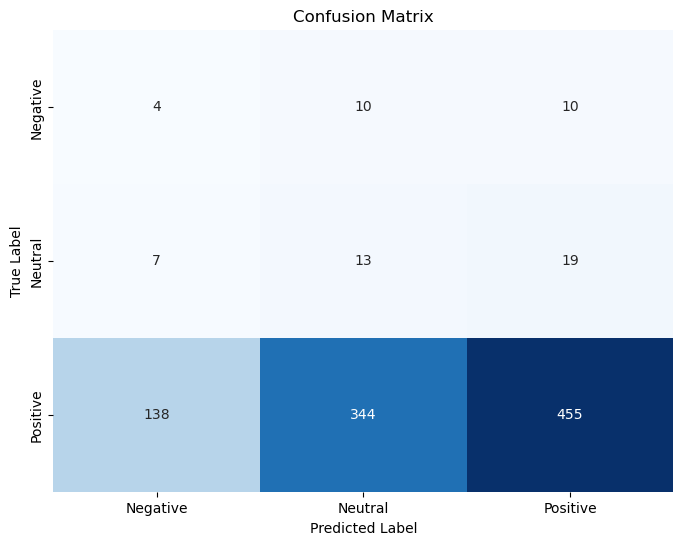

In [51]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

0.5113753403961905


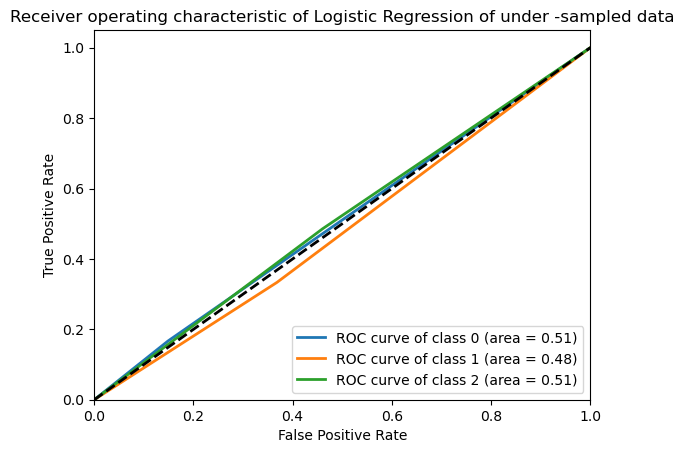

In [52]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted')) #roc_auc score would be found by weighted average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

a score of 0.51 suggests that, on average, the model has moderate discrimination ability across the different classes. 
It's neither very good nor very poor.

#### TFIDF Vectorizer for over-sampled data

In [53]:
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

### Logistic Regression for over-sampled data

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 542 seconds
[[ 12   4   8]
 [ 14   9  16]
 [215 180 542]]
              precision    recall  f1-score   support

           0       0.05      0.50      0.09        24
           1       0.05      0.23      0.08        39
           2       0.96      0.58      0.72       937

    accuracy                           0.56      1000
   macro avg       0.35      0.44      0.30      1000
weighted avg       0.90      0.56      0.68      1000

accuracy :  56.3


[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  9.0min finished


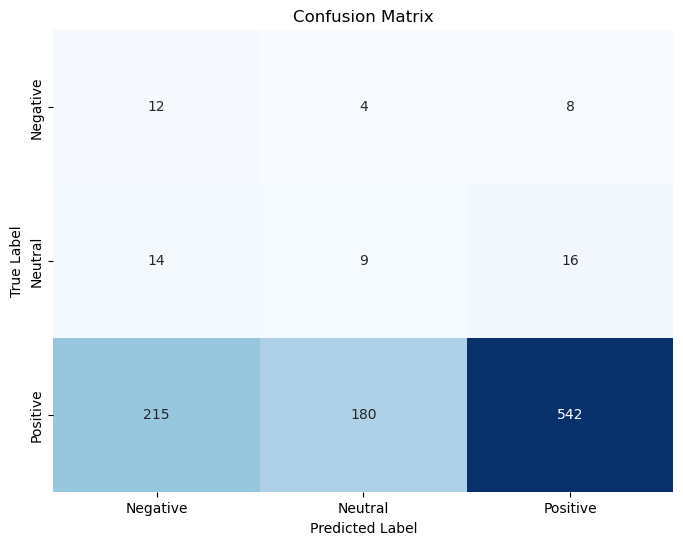

In [54]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
accuracy_lr=accuracy_score(y_val, y_pred)*100

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression on over-sampled data is perfrorming better than under-sampled data , accuracy is more .

0.5964746249312574


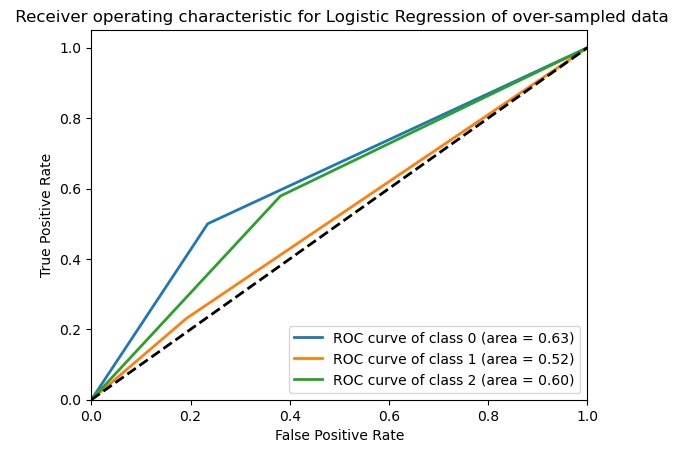

In [55]:
lb = LabelBinarizer() #convert labels into binary format (0 or 1). It is often used for multi-class classification tasks.
lb.fit(y_val) #Fits the LabelBinarizer on the true labels y_val (validation set)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted')) # Calculates the weighted average ROC AUC score.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

score of 0.59 suggests that, on average, the model has a moderate level of discrimination ability across the different classes.
It's an improvement over the previous score of 0.51

### Multinomial Naive Bayes

[[ 13   3   8]
 [  4  15  20]
 [ 10  84 843]]
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        24
           1       0.15      0.38      0.21        39
           2       0.97      0.90      0.93       937

    accuracy                           0.87      1000
   macro avg       0.53      0.61      0.55      1000
weighted avg       0.92      0.87      0.89      1000

87.1
0.9554232088070745
0.871


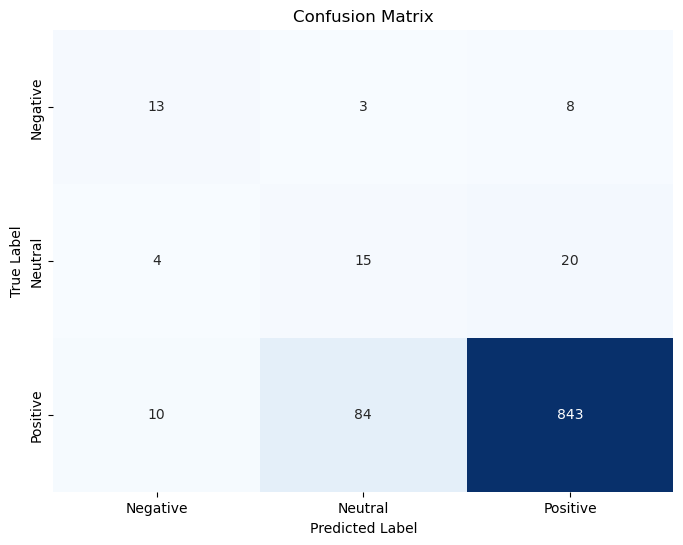

In [56]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
accuracy_mnb=accuracy_score(y_val, y_pred)*100
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy is 87.7 , for class 1(neutral) a f-1 score of 0.21 indicates a poor performance .

0.7253402980350235


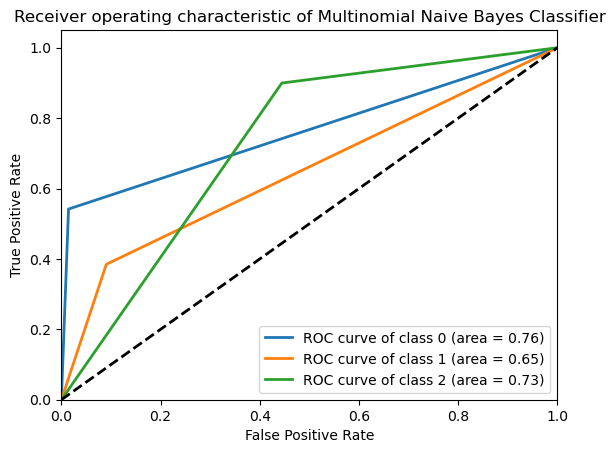

In [57]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

score of 0.72 suggests that the model has a moderate discriminatory ability.
It performs better than random chance but may not be highly accurate

### Random Forest Classifier

[[  7   0  17]
 [  0  10  29]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

accuracy :  95.39999999999999
1.0
0.954


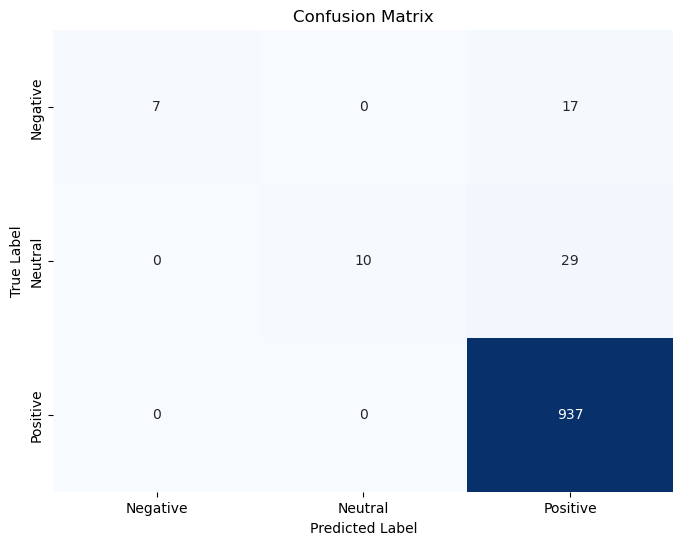

In [58]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
accuracy_rf=accuracy_score(y_val, y_pred)*100
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy is 95.3 , class 2 is more precised as compared to class 0 and class 1

0.6349206349206349


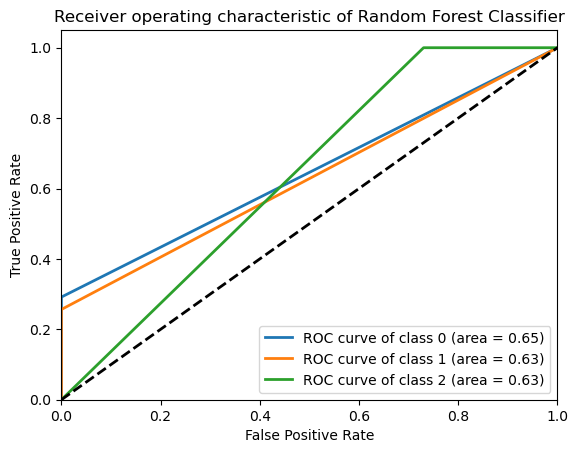

In [59]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

0.6349 falls between these extremes and suggests that the model has some discriminatory power,but it may not be highly accurate.

### XGBClassifier

[[  9   1  14]
 [  2  11  26]
 [  3   3 931]]
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        24
           1       0.73      0.28      0.41        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.78      0.55      0.62      1000
weighted avg       0.94      0.95      0.94      1000

accuracy :  95.1


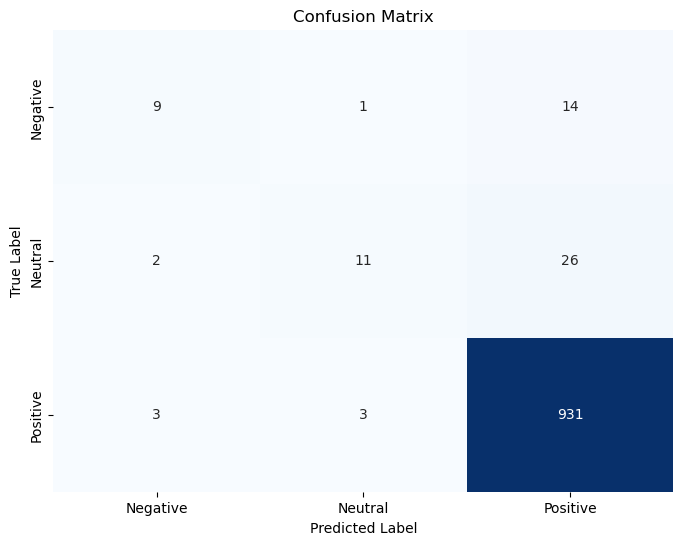

In [60]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)
accuracy_xgb=accuracy_score(y_val, y_pred)*100

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

0.677897041677193


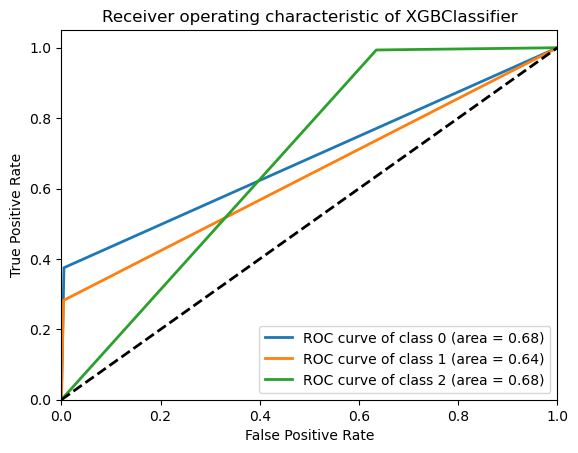

In [61]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

We can see that XGBoost is performing better in predicting all the classes.

### Multi-class SVM

[[ 14   1   9]
 [  5  15  19]
 [ 19  49 869]]
              precision    recall  f1-score   support

           0       0.37      0.58      0.45        24
           1       0.23      0.38      0.29        39
           2       0.97      0.93      0.95       937

    accuracy                           0.90      1000
   macro avg       0.52      0.63      0.56      1000
weighted avg       0.93      0.90      0.91      1000

accuracy :  89.8


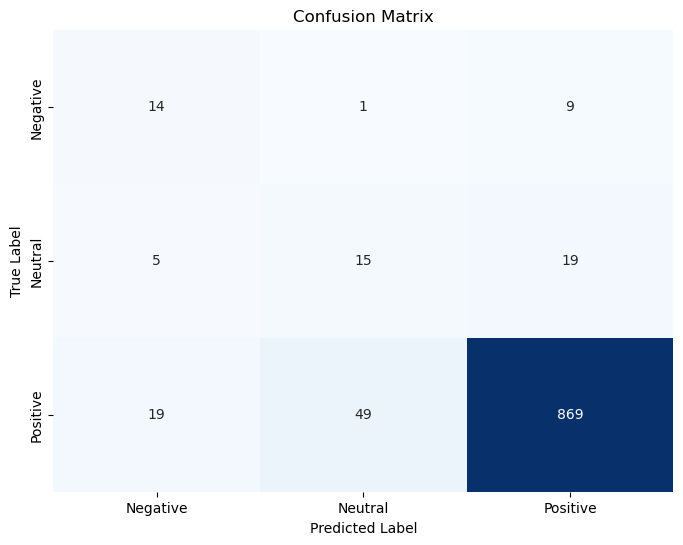

In [62]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train) 
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)
accuracy_mcsvm=accuracy_score(y_val, y_pred)*100

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

0.739468127652396


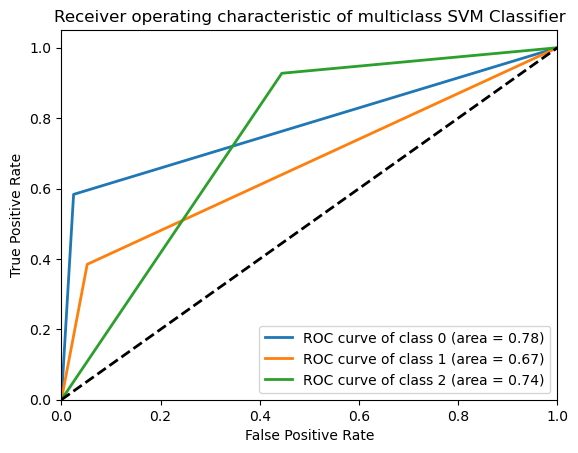

In [63]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

### ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB

[[ 13   3   8]
 [  5  15  19]
 [ 13  86 838]]
              precision    recall  f1-score   support

           0       0.42      0.54      0.47        24
           1       0.14      0.38      0.21        39
           2       0.97      0.89      0.93       937

    accuracy                           0.87      1000
   macro avg       0.51      0.61      0.54      1000
weighted avg       0.92      0.87      0.89      1000

accuracy :  86.6


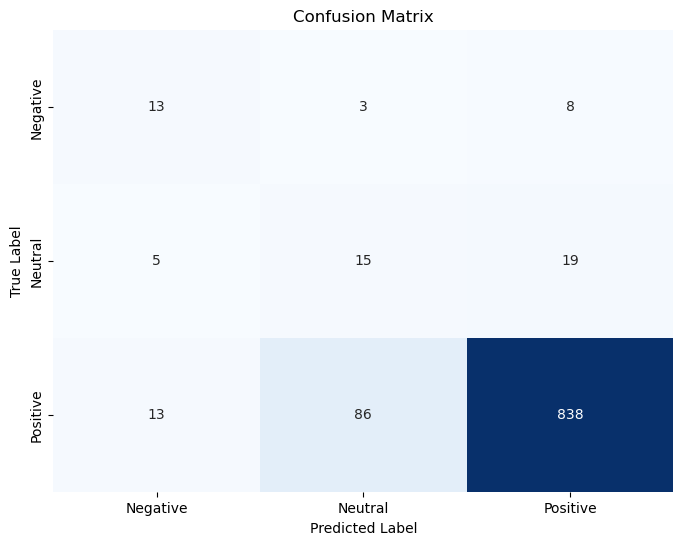

In [64]:
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
# voting='hard' means the final prediction is based on a majority vote among the base models.
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)
accuracy_vc=accuracy_score(y_val, y_pred)*100

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can see that the above model performs almost same as oversampled multinomial model but it increases the chances of prediction of minority classes.

### Sentiment Score

Polarity:
Polarity measures the positivity or negativity of the text on a scale from -1 to 1.
0 indicates a neutral sentiment.
Positive values (close to 1) indicate a positive sentiment.
Negative values (close to -1) indicate a negative sentiment.

Subjectivity:
Subjectivity measures how subjective or objective the text is on a scale from 0 to 1.
0 indicates a highly objective (factual) text.
1 indicates a highly subjective (opinionated) text.

In [66]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment 
def polarity(x):
    return TextBlob(x).polarity+1
 
train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] =train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train.senti_score.head()

0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: senti_score, dtype: object

Example 4 , 
Polarity: 0.6 (Positive)
Subjectivity: 0.725 (Highly subjective)

In [67]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [68]:
Train.head()

,name,categories,primaryCategories,reviews_day,reviews_month,reviews_year,polarity,0,1,2,...,997,998,999,1000,1001,1002,1003,1004,1005,1006
0,2,10,0,26,12,2016,1.374792,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,1,17,1,2018,1.458214,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,22,3,4,8,2017,1.690000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,9,0,23,1,2017,1.187500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,16,3,23,12,2016,1.600000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
Test_Val.head()

,name,categories,primaryCategories,reviews_day,reviews_month,reviews_year,polarity,0,1,2,...,997,998,999,1000,1001,1002,1003,1004,1005,1006
0,19,11,0,23,5,2016,1.400000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,6,1,2,1,2018,1.457359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10,0,2,1,2017,1.900000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,9,0,25,3,2017,0.906944,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,6,1,15,11,2017,1.450000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[[ 13   3   8]
 [  4  15  20]
 [ 10  84 843]]
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        24
           1       0.15      0.38      0.21        39
           2       0.97      0.90      0.93       937

    accuracy                           0.87      1000
   macro avg       0.53      0.61      0.55      1000
weighted avg       0.92      0.87      0.89      1000

87.1
0.9561451001624256
0.871


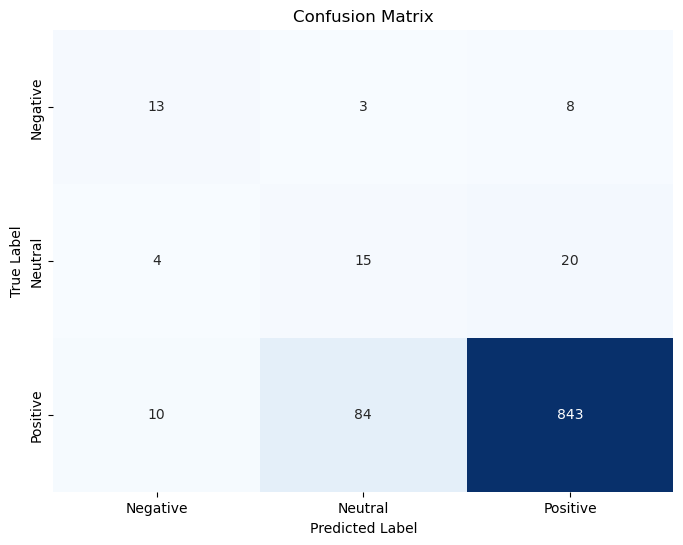

In [70]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
accuracy_mnbwss=accuracy_score(y_val, y_pred)*100
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Earlier it was 87.7 now it's 87.7 , Sentiment Score does not have much affect on the performance

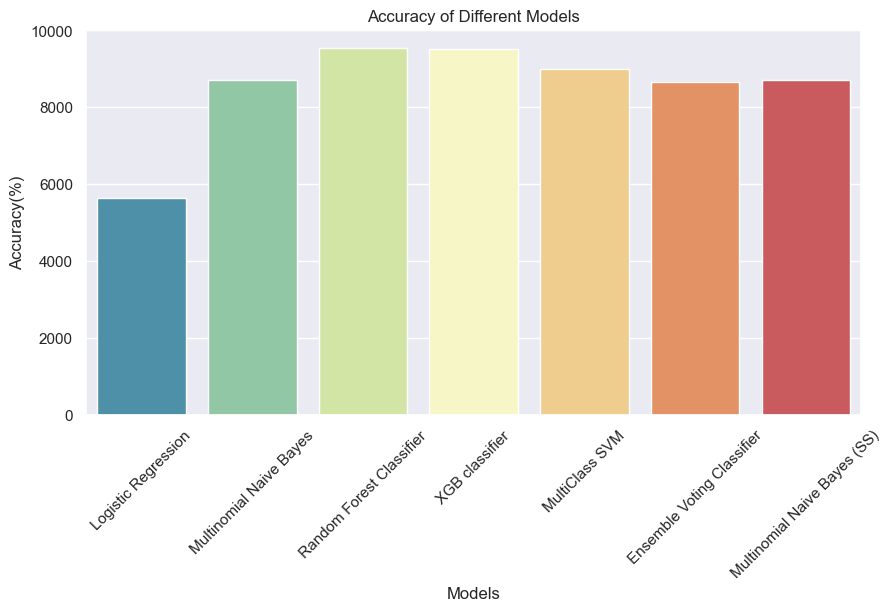

The model with the maximum Accuracy is: Random Forest Classifier


In [71]:
Models = pd.DataFrame({
    'Models': ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest Classifier', 'XGB classifier', 'MultiClass SVM', 'Ensemble Voting Classifier', 'Multinomial Naive Bayes (SS)'],
    'Accuracy': [accuracy_lr * 100, accuracy_mnb * 100, accuracy_rf * 100, accuracy_xgb * 100, accuracy_mcsvm * 100, accuracy_vc * 100, accuracy_mnbwss * 100]
})

plt.figure(figsize=(10, 5))
sns.set()
sns.barplot(x='Models', y='Accuracy', data=Models, palette="Spectral_r")
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()

max_accuracy = Models.loc[Models['Accuracy'].idxmax(), 'Models']
print(f"The model with the maximum Accuracy is: {max_accuracy}")


we will use xg classifier as it has a good accuracy and a better roc_auc score as compared to random forest

In [72]:
tvec1.fit(train['reviews.text'])
tvec_text = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec2.fit(train['reviews.title'])
tvec_title = pd.DataFrame(tvec2.transform(test['reviews.title']).toarray())

In [73]:
def senti(x):
    return TextBlob(x).sentiment 
def polarity(x):
    return TextBlob(x).polarity+1
 
test['senti_score'] = test['reviews.text'].apply(senti)
test['polarity'] = test['reviews.text'].apply(polarity)

test.senti_score.head()

0                                    (0.4, 0.8)
1     (0.45735930735930735, 0.6531385281385281)
2                                  (0.9, 0.525)
3    (-0.09305555555555556, 0.4805555555555556)
4                                  (0.45, 0.75)
Name: senti_score, dtype: object

In [74]:
Test = pd.concat([test.drop(['reviews.text','reviews.title','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)
Test.to_csv('Test.csv',encoding='utf-8')
x_train=Train.values
y_train=train['sentiment']
x_test=Test.values

In [75]:
# Train the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=1000, max_depth=6)
xgb_classifier.fit(x_train, y_train)


# Predict sentiment for the test set
y_pred_test = xgb_classifier.predict(x_test)

# Add the predicted sentiment to the Test DataFrame
Test['sentiment'] = y_pred_test

# Display the Test DataFrame with the predicted sentiment
print(Test)

     name  categories  primaryCategories  reviews_day  reviews_month  \
0      19          11                  0           23              5   
1       9           6                  1            2              1   
2       2          10                  0            2              1   
3      13           9                  0           25              3   
4       9           6                  1           15             11   
..    ...         ...                ...          ...            ...   
995     9           6                  1            7             12   
996    12           0                  0           23              1   
997    15          17                  0           18              1   
998     2          10                  0           12             12   
999    19          11                  0           17              6   

     reviews_year  polarity    0    1    2  ...  998  999  1000  1001  1002  \
0            2016  1.400000  0.0  0.0  0.0  ...  0.0  0.

In [76]:
Test = Test.reset_index(drop=True)  # Reset index if needed

def decode_sentiment(sentiment):
    if sentiment == 0:
        return 'Negative'
    elif sentiment == 1:
        return 'Neutral'
    elif sentiment == 2:
        return 'Positive'
    else:
        return 'Unknown'

# Apply the decoding function to the 'sentiment' column in the Test DataFrame
Test['decoded_sentiment'] = Test['sentiment'].apply(decode_sentiment)

# Display the Test DataFrame with the decoded sentiment
Test.head()

,name,categories,primaryCategories,reviews_day,reviews_month,reviews_year,polarity,0,1,2,...,999,1000,1001,1002,1003,1004,1005,1006,sentiment,decoded_sentiment
0,19,11,0,23,5,2016,1.400000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Positive
1,9,6,1,2,1,2018,1.457359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Positive
2,2,10,0,2,1,2017,1.900000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Positive
3,13,9,0,25,3,2017,0.906944,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Positive
4,9,6,1,15,11,2017,1.450000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Positive


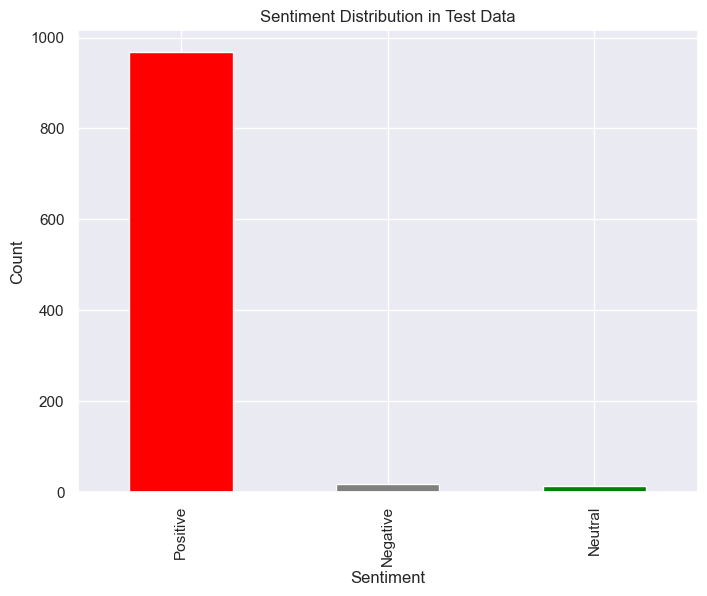

In [77]:
sentiment_counts = Test['decoded_sentiment'].value_counts()

# Plot a bar graph
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Sentiment Distribution in Test Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [78]:
# Concatenate the desired columns from Test and test DataFrames
result_df = pd.concat([Test[['sentiment', 'decoded_sentiment']], test[['reviews.title']]], axis=1)

# Display the joined DataFrame
result_df.head()

,sentiment,decoded_sentiment,reviews.title
0,2,Positive,very handy device
1,2,Positive,another winner from amazon
2,2,Positive,simple reliable
3,2,Positive,love
4,2,Positive,fantastic


In [79]:
result_df.to_csv('result.csv',encoding='utf-8')